In [1]:
import urllib.request
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\Courses\COURSERA\IBM Data Analyst Professional Certificate\IBM Data Analyst Capstone Project\W-5\CSV\m5_survey_data_technologies_normalised.csv')
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Step 3: Create a new DataFrame containing only the respondents who work with web frameworks.
web_framework_df = df[df['WebFrameWorkedWith'].notnull()]
# Step 4: Count the number of respondents who work with each web framework and sort the results in descending order.
web_framework_count = web_framework_df['WebFrameWorkedWith'].value_counts().sort_values(ascending=False)
# Step 5: Select the top 10 web frameworks with the highest number of respondents.
top_web_frameworks = web_framework_count.head(10).index.tolist()
# Step 6: Create a new DataFrame with the top 10 web frameworks and their corresponding number of respondents.
top_web_framework_df = pd.DataFrame({'Web Framework': top_web_frameworks, 'Respondents': web_framework_count.head(10).values})
print(top_web_framework_df)

        Web Framework  Respondents
0              jQuery         4629
1  Angular/Angular.js         3327
2            React.js         3302
3             ASP.NET         3042
4             Express         2028
5              Spring         1728
6              Vue.js         1485
7               Flask         1186
8              Django         1176
9             Laravel          939


In [33]:
import tabulate
top_languages = df['WebFrameWorkedWith'].value_counts().head(10)
# Create a new DataFrame with the top languages and their counts
top_languages_df = pd.DataFrame({'Web Framework': top_languages.index, 'Count': top_languages.values})
top_languages_df.index += 1
print(tabulate.tabulate(top_languages_df.reset_index(), headers=["Web Framework", "Count"], tablefmt="pipe", showindex=False))

|    | Web Framework      |   Count |
|---:|:-------------------|--------:|
|  1 | jQuery             |    4629 |
|  2 | Angular/Angular.js |    3327 |
|  3 | React.js           |    3302 |
|  4 | ASP.NET            |    3042 |
|  5 | Express            |    2028 |
|  6 | Spring             |    1728 |
|  7 | Vue.js             |    1485 |
|  8 | Flask              |    1186 |
|  9 | Django             |    1176 |
| 10 | Laravel            |     939 |


In [6]:
#convert data frame to cvs and save to local disk
import tempfile
tempdir = tempfile.gettempdir()
top_web_framework_df.to_csv(tempdir + '/top10_WebFrame.csv', index=False)
from IPython.display import FileLink
FileLink(tempdir + '/top10_WebFrame.csv')

C:\Users\Boris\AppData\Local\Temp\top10_WebFrame.csv

In [10]:
import plotly.express as px
# Step 1: Import the necessary libraries
# Step 2: Read in the CSV file containing the survey data into a DataFrame.
#df = pd.read_csv('survey_data.csv')
# Step 3: Create a new DataFrame containing only the respondents who work with web frameworks.
#web_framework_df = df[df['WebFrameWorkedWith'].notnull()]
# Step 4: Count the number of respondents who work with each web framework and sort the results in descending order.
#web_framework_count = web_framework_df['WebFrameWorkedWith'].value_counts().sort_values(ascending=False)
# Step 5: Select the top 10 web frameworks with the highest number of respondents.
#top_web_frameworks = web_framework_count.head(10).index.tolist()
# Step 6: Create a new DataFrame with the top 10 web frameworks and their corresponding number of respondents.
#top_web_framework_df = pd.DataFrame({'Web Framework': top_web_frameworks, 'Respondents': web_framework_count.head(10).values})
# Step 7: Create the hierarchy bubble chart
fig = px.sunburst(top_web_framework_df, path=['Web Framework'], values='Respondents',
                  color_continuous_scale='RdBu', color='Respondents',
                  hover_data=['Web Framework', 'Respondents'])
fig.update_layout(title='Top 10 Web Frameworks Worked With',
                  xaxis_title='Web Framework',
                  yaxis_title='Number of Respondents')
fig.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

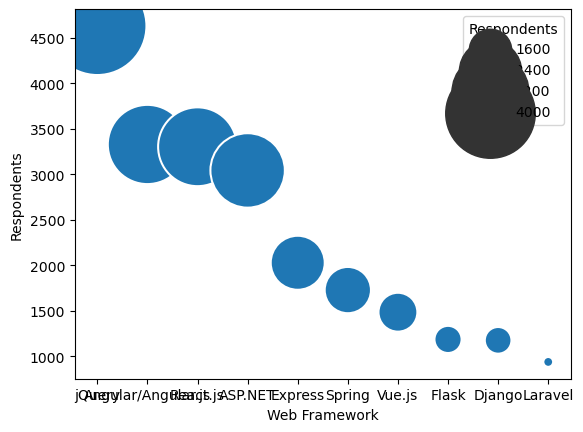

In [32]:
# data is not Hierarchy bubble chart
data = top_web_framework_df
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x='Web Framework', y='Respondents', size='Respondents', sizes=(50, 5000))

# show the graph
plt.show()